In [1]:
# Importing Libraries
  
import pandas as pd 

# to remove stopword
from nltk.corpus import stopwords

# for Stemming propose 
from nltk.stem.porter import PorterStemmer

import matplotlib.pyplot as plt

from collections import Counter

In [2]:

# Import dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t') 
dataset.sample(5)


,Review,Liked
727,A FLY was in my apple juice.. A FLY!!!!!!!!,0
89,Everything was fresh and delicious!,1
698,"Needless to say, we will never be back here ag...",0
771,Great time - family dinner on a Sunday night.,1
999,"Then, as if I hadn't wasted enough of my life ...",0


In [3]:
dataset.shape

(1000, 2)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
dataset.duplicated().sum()

4

In [6]:
dataset['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/lenovo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
dataset['num_charactes'] = dataset['Review'].apply(len)
dataset['num_words'] = dataset['Review'].apply(lambda x: len(nltk.word_tokenize(x)))
dataset['num_sentences'] = dataset['Review'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [9]:
dataset.sample(5)

,Review,Liked,num_charactes,num_words,num_sentences
435,It was a huge awkward 1.5lb piece of cow that ...,0,73,16,1
452,I am far from a sushi connoisseur but I can de...,0,138,27,1
67,Update.....went back for a second time and it ...,1,71,15,1
261,"I have been in more than a few bars in Vegas, ...",0,97,23,1
25,That's right....the red velvet cake.....ohhh t...,1,67,16,1


In [10]:
dataset.describe()

,Liked,num_charactes,num_words,num_sentences
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.50000,58.315000,12.684000,1.040000
std,0.50025,32.360052,6.735838,0.201098
min,0.00000,11.000000,3.000000,1.000000
25%,0.00000,33.000000,7.000000,1.000000
50%,0.50000,51.000000,11.000000,1.000000
75%,1.00000,80.000000,17.000000,1.000000
max,1.00000,149.000000,34.000000,3.000000


/home/lenovo/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


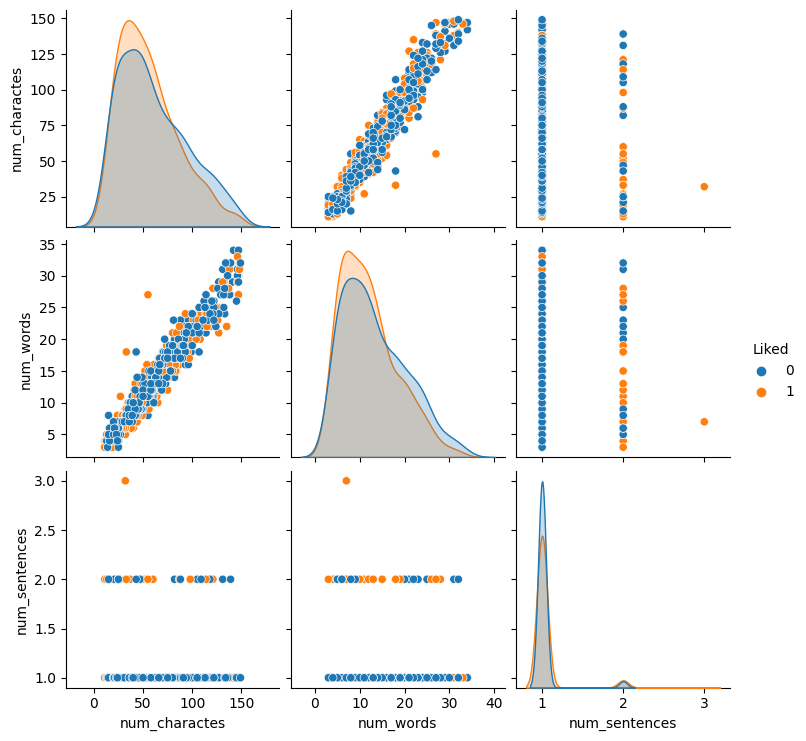

In [11]:
import seaborn as sns
sns.pairplot(dataset.drop(columns=['Review']),hue = 'Liked')

In [12]:
#Lower case
#tokenization
#special characters(@,#,..)
#stop words(is, the, of,...) and pucntuation
#Stemming (words such as dance, dances, dancing converts to 'danc')

In [13]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer



def transform_text(text):

    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


    



In [14]:
dataset['transformed_text'] = dataset['Review'].apply(transform_text)

In [15]:
from wordcloud import WordCloud
# wc = WordCloud(width=100, height=100, background_color='white')
wc = WordCloud()


In [16]:
text = dataset[dataset['Liked'] == 1]['transformed_text'].str.cat(sep=" ")
liked = wc.generate(text)

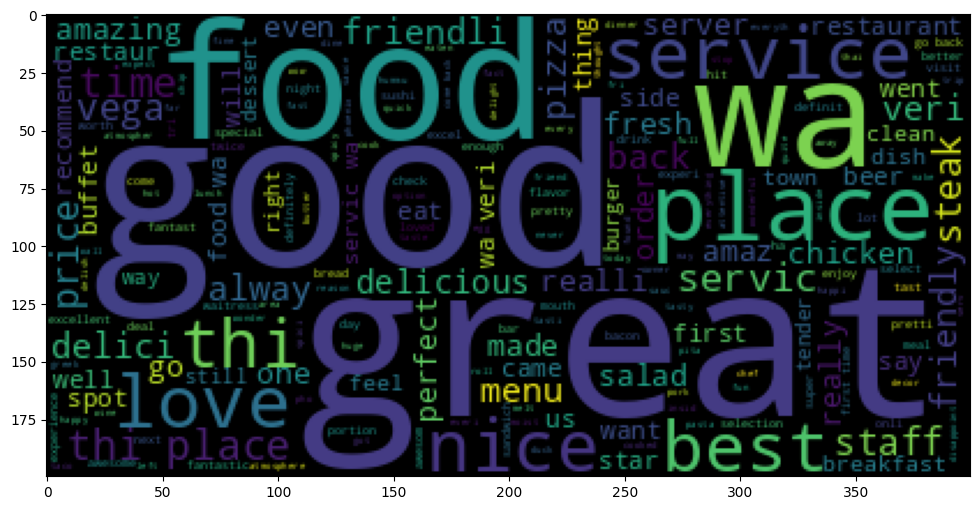

In [17]:
plt.figure(figsize=(15,6))
plt.imshow(liked)

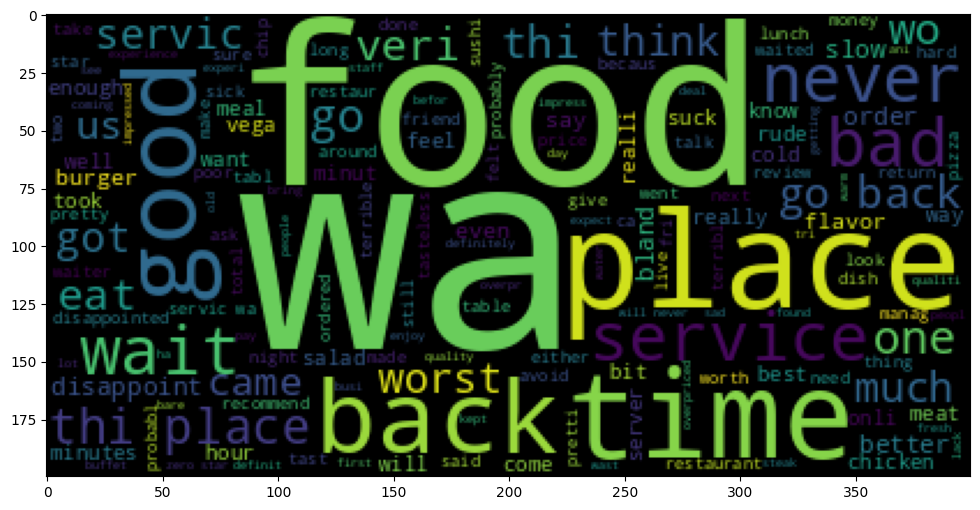

In [18]:
disliked = wc.generate(dataset[dataset['Liked'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(disliked)

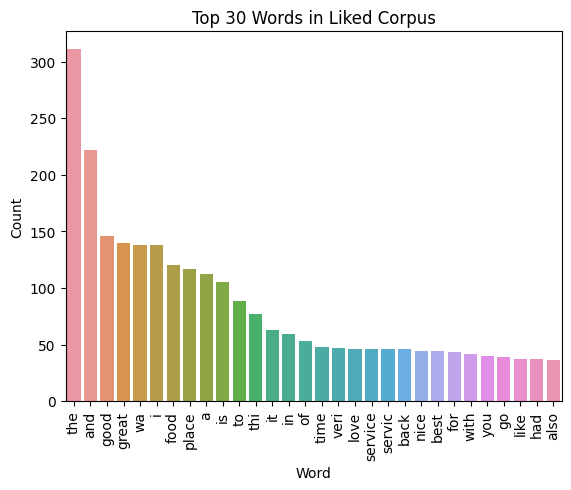

In [19]:
liked_corpus = []
for msg in dataset[dataset['Liked'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        liked_corpus.append(word)
liked_counter = Counter(liked_corpus)
liked_dataset = pd.DataFrame(liked_counter.most_common(30), columns=['Word', 'Count'])  
sns.barplot(x='Word', y='Count', data=liked_dataset)
plt.xticks(rotation='vertical')
plt.title('Top 30 Words in Liked Corpus')
plt.show()      

In [20]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [21]:
X = tfidf.fit_transform(dataset['transformed_text']).toarray()
y = dataset['Liked'].values

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [35]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
RFC = RandomForestClassifier(n_estimators = 501,criterion = 'entropy')

In [36]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

[[64 36]
 [29 71]]
0.675
0.6635514018691588


In [37]:


mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))



[[79 21]
 [22 78]]
0.785
0.7878787878787878


In [38]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

[[71 29]
 [16 84]]
0.775
0.7433628318584071


In [39]:
							
RFC.fit(X_train, y_train) 
y_pred4 = RFC.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

[[82 18]
 [27 73]]
0.775
0.8021978021978022
